
## Goal of the Analysis
The primary goal of this analysis is to explore and understand the characteristics of the Spotify Top 50 Tracks of 2020 dataset. By performing data cleaning, exploratory data analysis (EDA), and generating insights, we aim to answer specific questions about the dataset and identify patterns in popular music during 2020.

## Understand the Dataset:
- Identify and clean the data to ensure accuracy and reliability for analysis.
- Analyze Music Trends: Explore the audio characteristics of top tracks and their patterns in 2020.
- Evaluate Popular Artists and Albums: Determine the most popular artists and albums and their dominance in the top 50.
- Discover Genre-Based Insights: Compare features like danceability, loudness, and acousticness across genres.
- Provide Actionable Insights: Highlight correlations between audio features and popularity to guide music marketing or production.

## Load the data using Pandas.

In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('/content/spotifytoptracks.csv')

In [13]:
df.head()

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


#Data Cleaning
### Check for missing values


In [14]:
# Check for missing values
missing_values = df.isnull().sum()

##No missing values
missing_values

,0
Unnamed: 0,0
artist,0
album,0
track_name,0
track_id,0
energy,0
danceability,0
key,0
loudness,0
acousticness,0


In [17]:
# Display the first few rows and basic information
print(df.head())



   Unnamed: 0       artist                                  album  \
0           0   The Weeknd                            After Hours   
1           1  Tones And I                           Dance Monkey   
2           2  Roddy Ricch  Please Excuse Me For Being Antisocial   
3           3    SAINt JHN                  Roses (Imanbek Remix)   
4           4     Dua Lipa                       Future Nostalgia   

              track_name                track_id  energy  danceability  key  \
0        Blinding Lights  0VjIjW4GlUZAMYd2vXMi3b   0.730         0.514    1   
1           Dance Monkey  1rgnBhdG2JDFTbYkYRZAku   0.593         0.825    6   
2                The Box  0nbXyq5TXYPCO7pr3N8S4I   0.586         0.896   10   
3  Roses - Imanbek Remix  2Wo6QQD1KMDWeFkkjLqwx5   0.721         0.785    8   
4        Don't Start Now  3PfIrDoz19wz7qK7tYeu62   0.793         0.793   11   

   loudness  acousticness  speechiness  instrumentalness  liveness  valence  \
0    -5.934       0.00146      

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50 non-null     int64  
 1   artist            50 non-null     object 
 2   album             50 non-null     object 
 3   track_name        50 non-null     object 
 4   track_id          50 non-null     object 
 5   energy            50 non-null     float64
 6   danceability      50 non-null     float64
 7   key               50 non-null     int64  
 8   loudness          50 non-null     float64
 9   acousticness      50 non-null     float64
 10  speechiness       50 non-null     float64
 11  instrumentalness  50 non-null     float64
 12  liveness          50 non-null     float64
 13  valence           50 non-null     float64
 14  tempo             50 non-null     float64
 15  duration_ms       50 non-null     int64  
 16  genre             50 non-null     object 
dtyp

## Removing duplicate samples

In [18]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicate rows
df = df.drop_duplicates()


Number of duplicate rows: 0


# Treating outliers

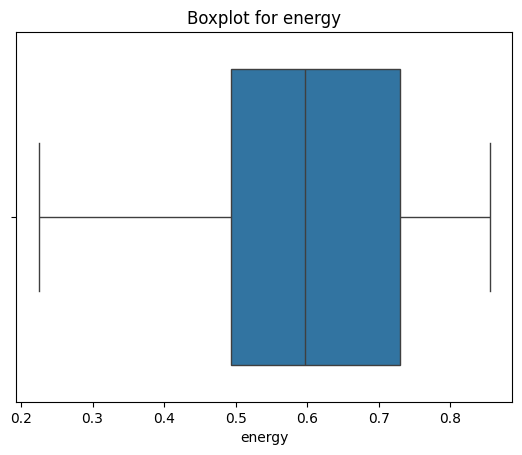

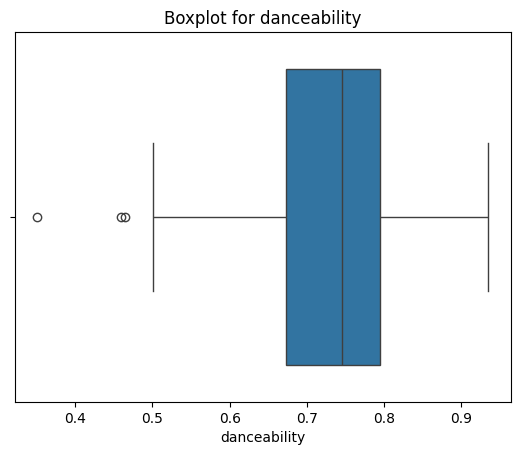

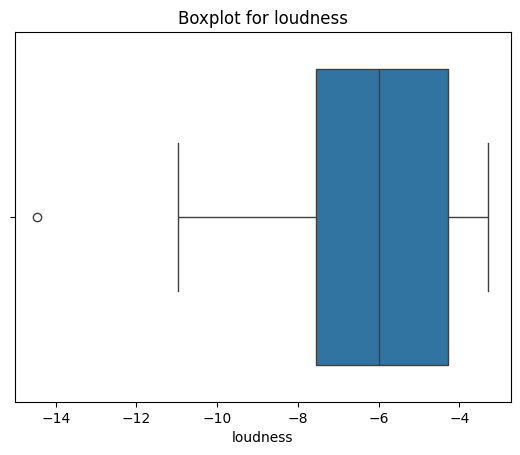

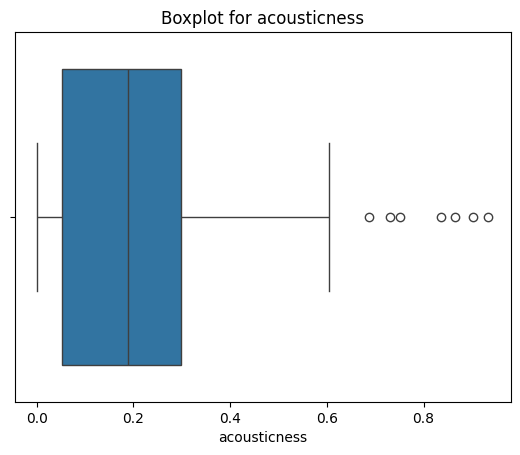

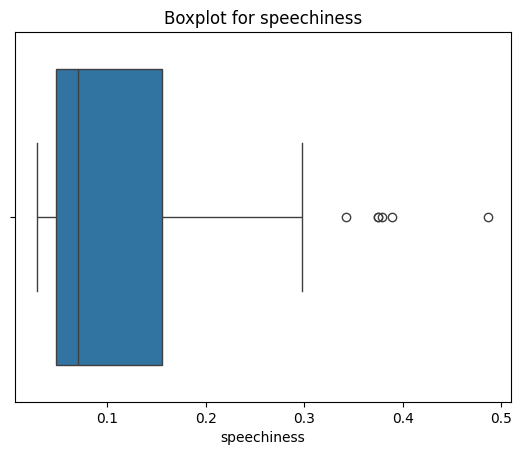

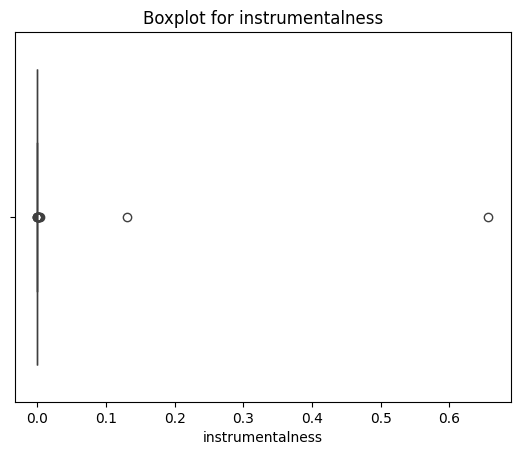

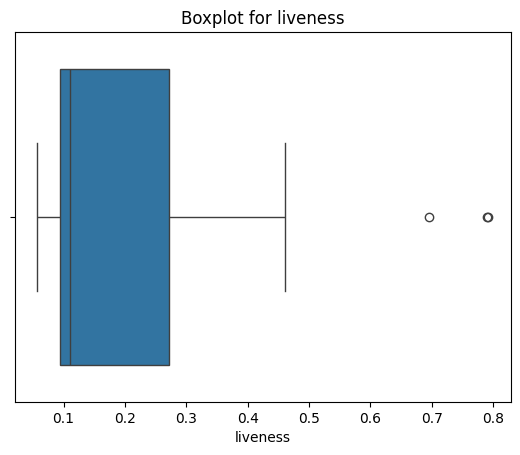

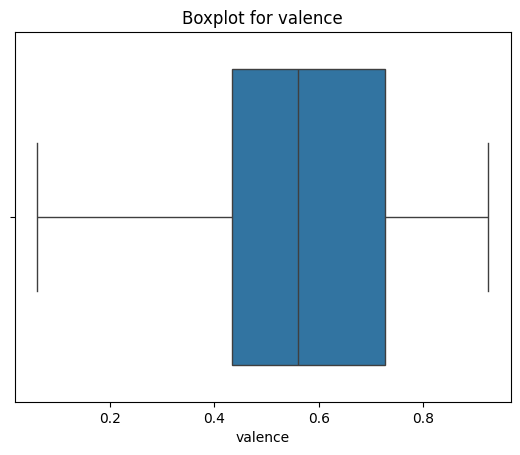

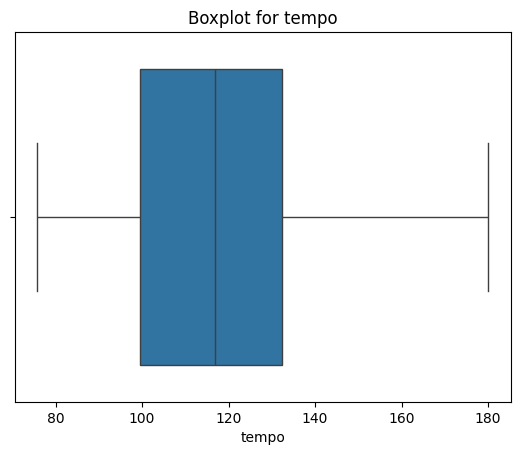

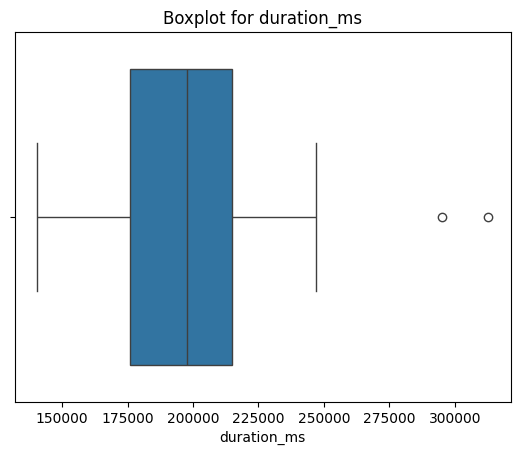

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize numeric columns for outliers
numeric_cols = ['energy', 'danceability', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
for col in numeric_cols:
    plt.figure()
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot for {col}')


In [20]:
# Example: Replace outliers in 'tempo' with the median
tempo_median = df['tempo'].median()
df['tempo'] = df['tempo'].apply(lambda x: tempo_median if x > 200 or x < 50 else x)
df

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.3340,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.5400,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.6420,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.8940,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.6790,123.950,183290,Nu-disco
5,5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.4970,89.977,181733,Hip-Hop/Rap
6,6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.5570,95.390,174000,Pop
7,7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.73100,0.1350,0.000000,0.6960,0.3480,144.026,173333,Hip-Hop/Rap
8,8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430,0.784,10,-8.756,0.12300,0.0364,0.000000,0.0887,0.2360,127.087,159382,R&B/Hip-Hop alternative
9,9,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,0.405,0.501,1,-5.679,0.75100,0.0319,0.000000,0.1050,0.4460,109.891,182161,Alternative/Indie


##  Exploratory Data Analysis

In [21]:
# Number of observations and features
observations = df.shape[0]
features = df.shape[1]

# Separate categorical and numeric columns
categorical_cols = ['artist', 'album', 'track_name', 'track_id', 'genre']
numeric_cols = ['energy', 'danceability', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

print(f"Observations: {observations}, Features: {features}")
print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)


Observations: 50, Features: 17
Categorical columns: ['artist', 'album', 'track_name', 'track_id', 'genre']
Numeric columns: ['energy', 'danceability', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


# Artists and albums

In [22]:
# Albums with more than one track
album_counts = df['album'].value_counts()
multiple_tracks_albums = album_counts[album_counts > 1]
multiple_tracks_albums

,count
album,
Future Nostalgia,3
Hollywood's Bleeding,2
Fine Line,2
Changes,2


In [23]:
# Artists with more than one popular track
artist_counts = df['artist'].value_counts()
multiple_tracks_artists = artist_counts[artist_counts > 1]
multiple_tracks_artists


,count
artist,
Billie Eilish,3
Dua Lipa,3
Travis Scott,3
Justin Bieber,2
Harry Styles,2
Lewis Capaldi,2
Post Malone,2


In [24]:
# Most popular artist
most_popular_artist = artist_counts.idxmax()
most_popular_artist

'Billie Eilish'

 # Genre analysis

In [25]:
# Most popular genre
popular_genre = df['genre'].value_counts().idxmax()
popular_genre

'Pop'

In [26]:

# Genres with one song
one_song_genres= df['genre'].value_counts()[df['genre'].value_counts() == 1]
one_song_genres


,count
genre,
Nu-disco,1
R&B/Hip-Hop alternative,1
Pop/Soft Rock,1
Pop rap,1
Hip-Hop/Trap,1
Dance-pop/Disco,1
Disco-pop,1
Dreampop/Hip-Hop/R&B,1
Alternative/reggaeton/experimental,1


In [27]:
# Total genres represented
total_genres = df['genre'].nunique()
total_genres


16

 ## Correlations

In [28]:
# Correlation matrix
correlation_matrix = df[numeric_cols].corr()

correlation_matrix

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.000000,0.152552,0.791640,-0.682479,0.074267,-0.385515,0.069487,0.393453,0.075191,0.081971
danceability,0.152552,1.000000,0.167147,-0.359135,0.226148,-0.017706,-0.006648,0.479953,0.168956,-0.033763
loudness,0.791640,0.167147,1.000000,-0.498695,-0.021693,-0.553735,-0.069939,0.406772,0.102097,0.064130
acousticness,-0.682479,-0.359135,-0.498695,1.000000,-0.135392,0.352184,-0.128384,-0.243192,-0.241119,-0.010988
speechiness,0.074267,0.226148,-0.021693,-0.135392,1.000000,0.028948,-0.142957,0.053867,0.215504,0.366976
instrumentalness,-0.385515,-0.017706,-0.553735,0.352184,0.028948,1.000000,-0.087034,-0.203283,0.018853,0.184709
liveness,0.069487,-0.006648,-0.069939,-0.128384,-0.142957,-0.087034,1.000000,-0.033366,0.025457,-0.090188
valence,0.393453,0.479953,0.406772,-0.243192,0.053867,-0.203283,-0.033366,1.000000,0.045089,-0.039794
tempo,0.075191,0.168956,0.102097,-0.241119,0.215504,0.018853,0.025457,0.045089,1.000000,0.130328
duration_ms,0.081971,-0.033763,0.064130,-0.010988,0.366976,0.184709,-0.090188,-0.039794,0.130328,1.000000


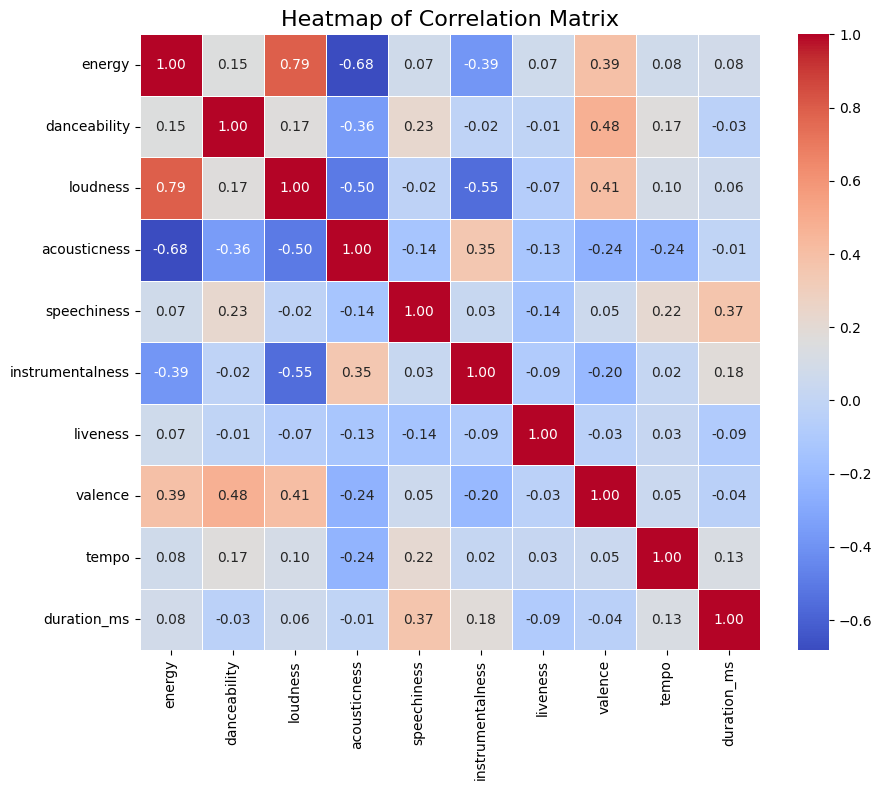

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Heatmap of Correlation Matrix", fontsize=16)
plt.show()


In [32]:
# Strong correlations
strong_positive_corr = correlation_matrix[correlation_matrix > 0.7]
strong_positive_corr

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.00000,NaN,0.79164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,0.79164,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
duration_ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [35]:
# Strong correlations
strong_negative_corr = correlation_matrix[correlation_matrix > -0.7]
strong_negative_corr

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.000000,0.152552,0.791640,-0.682479,0.074267,-0.385515,0.069487,0.393453,0.075191,0.081971
danceability,0.152552,1.000000,0.167147,-0.359135,0.226148,-0.017706,-0.006648,0.479953,0.168956,-0.033763
loudness,0.791640,0.167147,1.000000,-0.498695,-0.021693,-0.553735,-0.069939,0.406772,0.102097,0.064130
acousticness,-0.682479,-0.359135,-0.498695,1.000000,-0.135392,0.352184,-0.128384,-0.243192,-0.241119,-0.010988
speechiness,0.074267,0.226148,-0.021693,-0.135392,1.000000,0.028948,-0.142957,0.053867,0.215504,0.366976
instrumentalness,-0.385515,-0.017706,-0.553735,0.352184,0.028948,1.000000,-0.087034,-0.203283,0.018853,0.184709
liveness,0.069487,-0.006648,-0.069939,-0.128384,-0.142957,-0.087034,1.000000,-0.033366,0.025457,-0.090188
valence,0.393453,0.479953,0.406772,-0.243192,0.053867,-0.203283,-0.033366,1.000000,0.045089,-0.039794
tempo,0.075191,0.168956,0.102097,-0.241119,0.215504,0.018853,0.025457,0.045089,1.000000,0.130328
duration_ms,0.081971,-0.033763,0.064130,-0.010988,0.366976,0.184709,-0.090188,-0.039794,0.130328,1.000000


In [37]:
# Filter for specific genres
selected_genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']
filtered_data = df[df['genre'].isin(selected_genres)]
filtered_data



,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.5400,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.6420,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.8940,121.962,176219,Dance/Electronic
5,5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.4970,89.977,181733,Hip-Hop/Rap
6,6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.5570,95.390,174000,Pop
7,7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.73100,0.1350,0.000000,0.6960,0.3480,144.026,173333,Hip-Hop/Rap
9,9,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,0.405,0.501,1,-5.679,0.75100,0.0319,0.000000,0.1050,0.4460,109.891,182161,Alternative/Indie
10,10,KAROL G,Tusa,Tusa,7k4t7uLgtOxPwTpFmtJNTY,0.715,0.803,2,-3.280,0.29500,0.2980,0.000134,0.0574,0.5740,101.085,200960,Pop
11,11,Arizona Zervas,ROXANNE,ROXANNE,696DnlkuDOXcMAnKlTgXXK,0.601,0.621,6,-5.616,0.05220,0.1480,0.000000,0.4600,0.4570,116.735,163636,Hip-Hop/Rap
13,13,Lil Mosey,Certified Hitmaker,Blueberry Faygo,22LAwLoDA5b4AaGSkg6bKW,0.554,0.774,0,-7.909,0.20700,0.0383,0.000000,0.1320,0.3490,99.034,162547,Hip-Hop/Rap


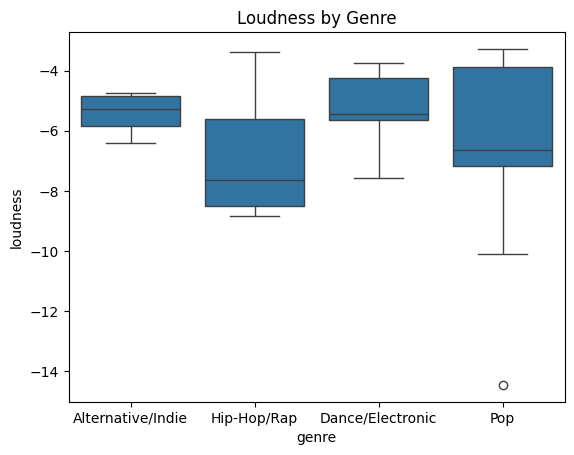

In [38]:
sns.boxplot(data=filtered_data, x='genre', y='loudness')
plt.title('Loudness by Genre')
plt.show()

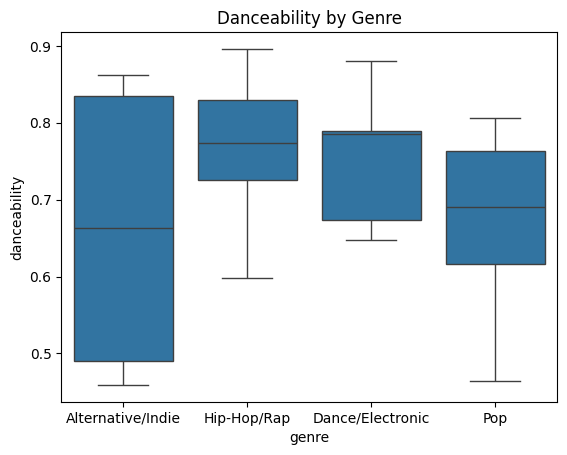

In [39]:
# Compare features across genres
sns.boxplot(data=filtered_data, x='genre', y='danceability')
plt.title('Danceability by Genre')
plt.show()


## Conclusions
- Pop Genre Dominance: The Pop genre has the highest representation in the Top 50, indicating its popularity in 2020.
- Loudness and Energy Link: Tracks with high loudness tend to have higher energy, showing these features are strongly correlated.
- Artist Popularity Impact: The success of tracks is significantly influenced by the popularity of the artists, as many top artists have multiple tracks on the list.
-Comparative Study with Previous Years: Analyze the Top 50 tracks from prior years to identify trends and changes in music preferences over time.
- Trend Analysis in Audio Features: Compare how features like energy, loudness, and danceability evolved between 2020 and earlier years.